# 0. 자료준비 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/CORONA/TimeAge.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np


In [5]:
df = pd.read_csv(filename)
print(df)

            date  time  age  confirmed  deceased
0     2020-03-02     0   0s         32         0
1     2020-03-02     0  10s        169         0
2     2020-03-02     0  20s       1235         0
3     2020-03-02     0  30s        506         1
4     2020-03-02     0  40s        633         1
...          ...   ...  ...        ...       ...
1084  2020-06-30     0  40s       1681         3
1085  2020-06-30     0  50s       2286        15
1086  2020-06-30     0  60s       1668        41
1087  2020-06-30     0  70s        850        82
1088  2020-06-30     0  80s        556       139

[1089 rows x 5 columns]


In [6]:
df2=df.drop('time',axis=1) # 타임 칼럼 삭제 
df2

,date,age,confirmed,deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1
...,...,...,...,...
1084,2020-06-30,40s,1681,3
1085,2020-06-30,50s,2286,15
1086,2020-06-30,60s,1668,41
1087,2020-06-30,70s,850,82


# 1. 20대 & 80대 일별 확진자와 사망자 시각화


### 1-1 데이터 전처리

In [7]:
# 일별로 데이터 만듬
df_date_03 = df2[df2['date'].str.contains('2020-03')]
df_date_04 = df2[df2['date'].str.contains('2020-04')]
df_date_05 = df2[df2['date'].str.contains('2020-05')]
df_date_06 = df2[df2['date'].str.contains('2020-06')]

In [8]:
# 20대 일별 확진자 
df_date_033 = df_date_03[df_date_03['age'].str.contains('20s')]
df_date_044 = df_date_04[df_date_04['age'].str.contains('20s')]
df_date_055 = df_date_05[df_date_05['age'].str.contains('20s')]
df_date_066 = df_date_06[df_date_06['age'].str.contains('20s')]

In [9]:
# 80대 일별 확진자
df_date_833 = df_date_03[df_date_03['age'].str.contains('80s')]
df_date_844 = df_date_04[df_date_04['age'].str.contains('80s')]
df_date_855 = df_date_05[df_date_05['age'].str.contains('80s')]
df_date_866 = df_date_06[df_date_06['age'].str.contains('80s')]

In [10]:
# 일별
month_date_date=[]

date =[]

for num in df_date_033.date.str.split('-').str[2]:
    date.append(num)
month_date_date.append(date)
date =[]
for num in df_date_044.date.str.split('-').str[2]:
    date.append(num)
month_date_date.append(date)
date =[]
for num in df_date_055.date.str.split('-').str[2]:
    date.append(num)
month_date_date.append(date)
date =[]
for num in df_date_066.date.str.split('-').str[2]:
    date.append(num)
month_date_date.append(date)

In [11]:
# 20대 일별 확진자 
month_date_confirmed=[]

tmp =[]

for num in df_date_033['confirmed']:
    tmp.append(num)
month_date_confirmed.append(tmp)
tmp =[]
for num in df_date_044['confirmed']:
    tmp.append(num)
month_date_confirmed.append(tmp)
tmp =[]
for num in df_date_055['confirmed']:
    tmp.append(num)
month_date_confirmed.append(tmp)
tmp =[]
for num in df_date_066['confirmed']:
    tmp.append(num)
month_date_confirmed.append(tmp)




In [12]:
# 80대 확진자 
month_date_confirmed80=[]

tmp2 =[]

for num in df_date_833['confirmed']:
    tmp2.append(num)
month_date_confirmed80.append(tmp2)
tmp2 =[]
for num in df_date_844['confirmed']:
    tmp2.append(num)
month_date_confirmed80.append(tmp2)
tmp2 =[]
for num in df_date_855['confirmed']:
    tmp2.append(num)
month_date_confirmed80.append(tmp2)
tmp2 =[]
for num in df_date_866['confirmed']:
    tmp2.append(num)
month_date_confirmed80.append(tmp2)


In [13]:
# 20대 일별 사망자
month_date_deceased=[]

tmp3 =[]

for num in df_date_033['deceased']:
    tmp3.append(num)
month_date_deceased.append(tmp3)
tmp3 =[]
for num in df_date_044['deceased']:
    tmp3.append(num)
month_date_deceased.append(tmp3)
tmp3 =[]
for num in df_date_055['deceased']:
    tmp3.append(num)
month_date_deceased.append(tmp3)
tmp3 =[]
for num in df_date_066['deceased']:
    tmp3.append(num)
month_date_deceased.append(tmp3)

In [14]:
# 80대 사망자
month_date_deceased80=[]

tmp4 =[]

for num in df_date_833['deceased']:
    tmp4.append(num)
month_date_deceased80.append(tmp4)
tmp4 =[]
for num in df_date_844['deceased']:
    tmp4.append(num)
month_date_deceased80.append(tmp4)
tmp4 =[]
for num in df_date_855['deceased']:
    tmp4.append(num)
month_date_deceased80.append(tmp4)
tmp4 =[]
for num in df_date_866['deceased']:
    tmp4.append(num)
month_date_deceased80.append(tmp4)


### 1-2 20대 80대 일별 확진자 사망자 그래프 시각화

#### 1-2-1 꺽은선 *그래프* 시각화

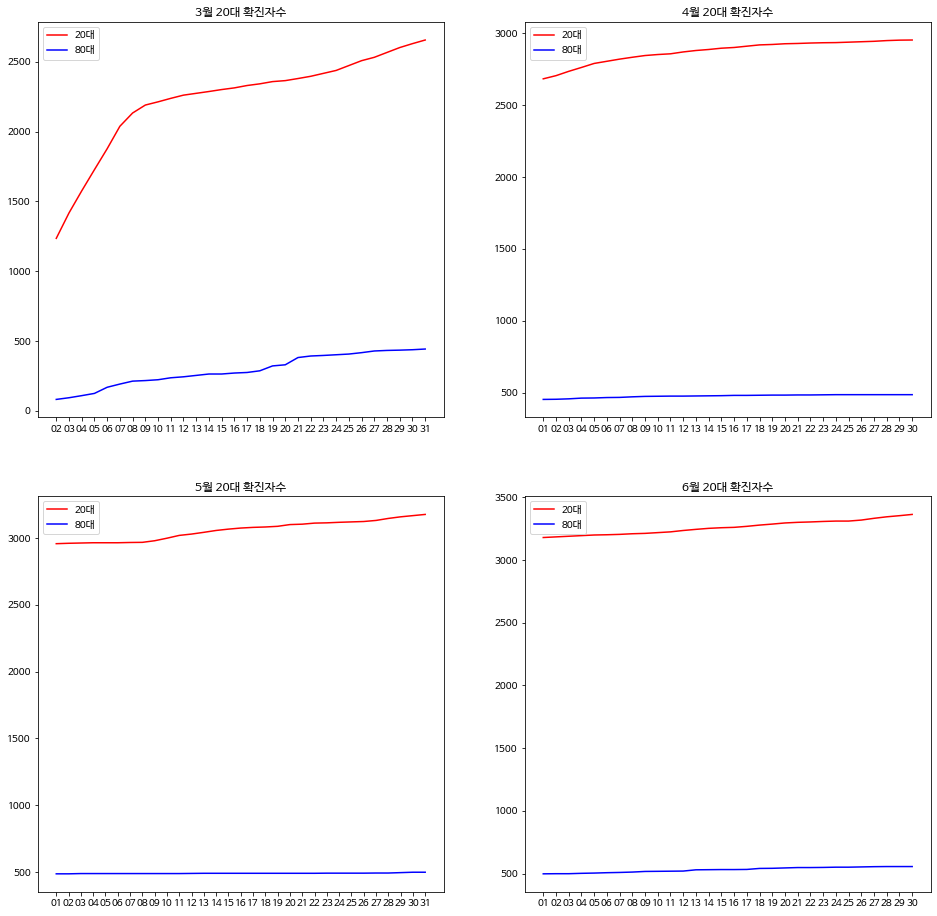

In [15]:
,'r'# 확진자
plt.figure(figsize=(16, 16))

plt.subplot(221)
plt.title('3월 20대 확진자수')
plt.plot(df_date_033.date.str.split('-').str[2], df_date_033.confirmed,'r')
plt.plot(df_date_833.date.str.split('-').str[2], df_date_833.confirmed,'b')
plt.legend(['20대','80대'])

plt.subplot(222)
plt.title('4월 20대 확진자수')
plt.plot(df_date_044.date.str.split('-').str[2], df_date_044.confirmed,'r')
plt.plot(df_date_844.date.str.split('-').str[2], df_date_844.confirmed,'b')
plt.legend(['20대','80대'])

plt.subplot(223)
plt.title('5월 20대 확진자수')
plt.plot(df_date_055.date.str.split('-').str[2], df_date_055.confirmed,'r')
plt.plot(df_date_855.date.str.split('-').str[2], df_date_855.confirmed,'b')
plt.legend(['20대','80대'])

plt.subplot(224)
plt.title('6월 20대 확진자수')
plt.plot(df_date_066.date.str.split('-').str[2], df_date_066.confirmed,'r')
plt.plot(df_date_866.date.str.split('-').str[2], df_date_866.confirmed,'b')
plt.legend(['20대','80대'])

plt.show()

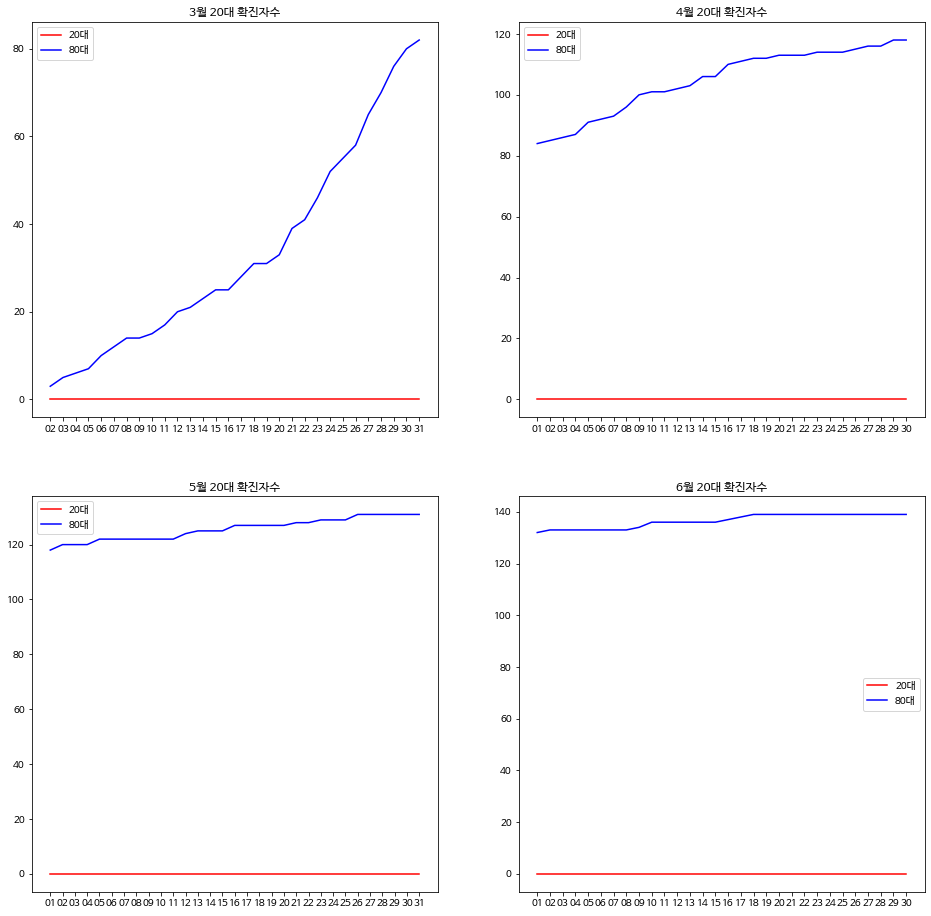

In [16]:
#사망자
plt.figure(figsize=(16, 16))

plt.subplot(221)
plt.title('3월 20대 확진자수')
plt.plot(df_date_033.date.str.split('-').str[2], df_date_033.deceased,'r')
plt.plot(df_date_833.date.str.split('-').str[2], df_date_833.deceased,'b')
plt.legend(['20대','80대'])

plt.subplot(222)
plt.title('4월 20대 확진자수')
plt.plot(df_date_044.date.str.split('-').str[2], df_date_044.deceased,'r')
plt.plot(df_date_844.date.str.split('-').str[2], df_date_844.deceased,'b')
plt.legend(['20대','80대'])

plt.subplot(223)
plt.title('5월 20대 확진자수')
plt.plot(df_date_055.date.str.split('-').str[2], df_date_055.deceased,'r')
plt.plot(df_date_855.date.str.split('-').str[2], df_date_855.deceased,'b')
plt.legend(['20대','80대'])

plt.subplot(224)
plt.title('6월 20대 확진자수')
plt.plot(df_date_066.date.str.split('-').str[2], df_date_066.deceased,'r')
plt.plot(df_date_866.date.str.split('-').str[2], df_date_866.deceased,'b')
plt.legend(['20대','80대'])

plt.show()

#### 1-2-2 막대그래프 시각화

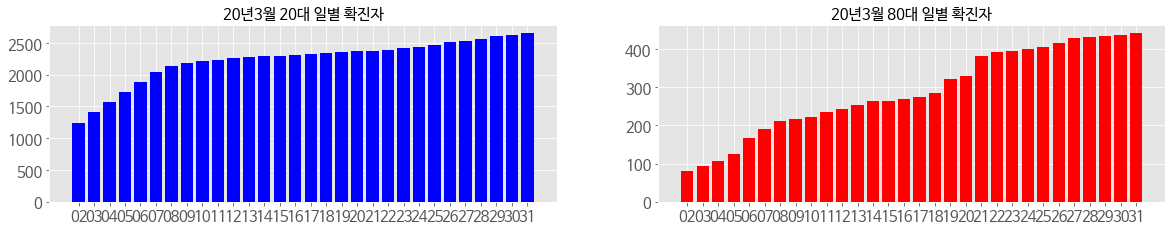

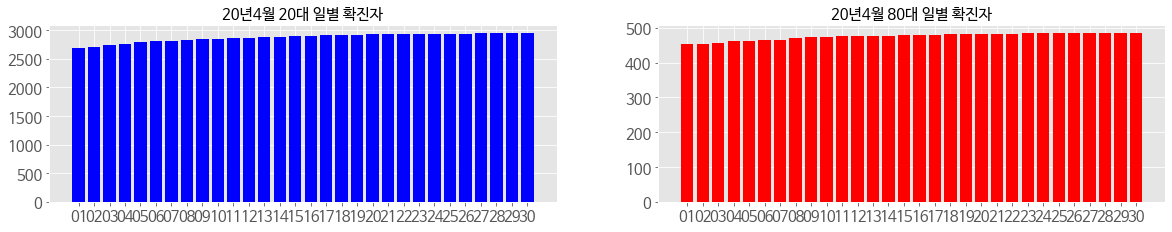

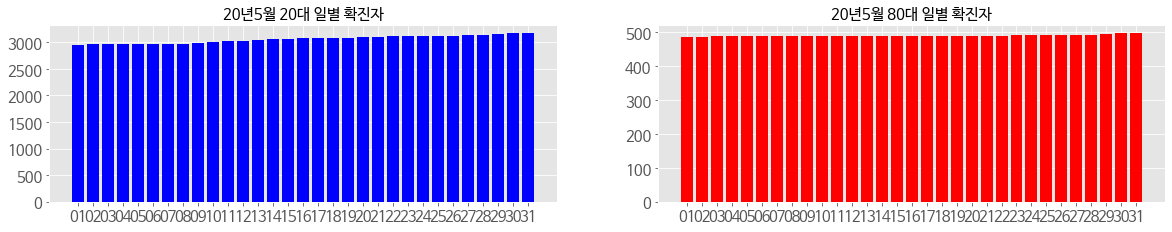

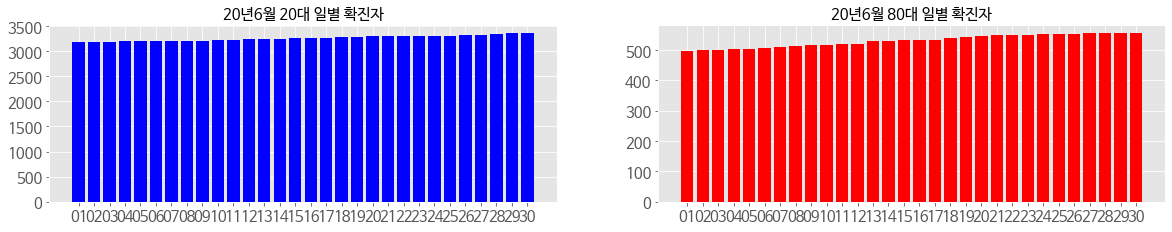

In [17]:
# 막대 그래프
import matplotlib.pyplot as plt

for i in range(1,5):
    plt.figure(figsize= (20,15))
    plt.style.use('ggplot')      # 격자 무늬 스타일 지정

    # 20대 확진자 시각화
    plt.subplot(4,2,2*i-1)
    title='20년'+str(i+2)+"월 20대 일별 확진자"
    plt.title(title,fontsize=15)
    plt.xticks( fontsize=15)
    plt.yticks( fontsize=15)
    for j in range(len(month_date_date[i-1])):
        plt.bar(month_date_date[i-1][j],month_date_confirmed[i-1][j],color='b')
    #plt.rc('legend', fontsize=20) # 라벨 사이즈
    #plt.legend()

    # 80대 확진자 시각화
    plt.subplot(4,2,i*2)
    title='20년'+str(i+2)+"월 80대 일별 확진자"
    plt.title(title,fontsize=15)
    plt.xticks( fontsize=15)
    plt.yticks( fontsize=15)
    for j in range(len(month_date_date[i-1])):
        plt.bar(month_date_date[i-1][j],month_date_confirmed80[i-1][j],color='r')
    
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


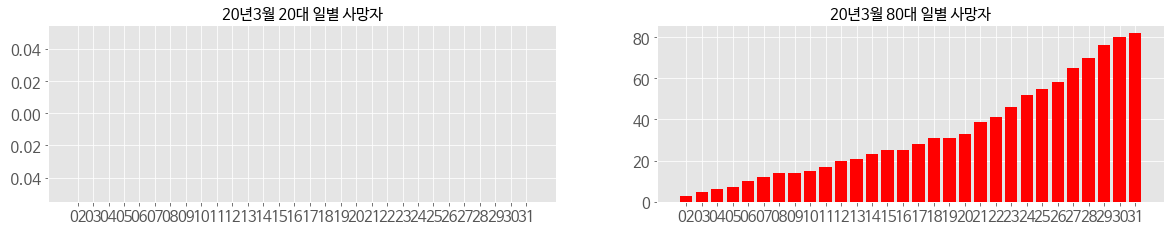

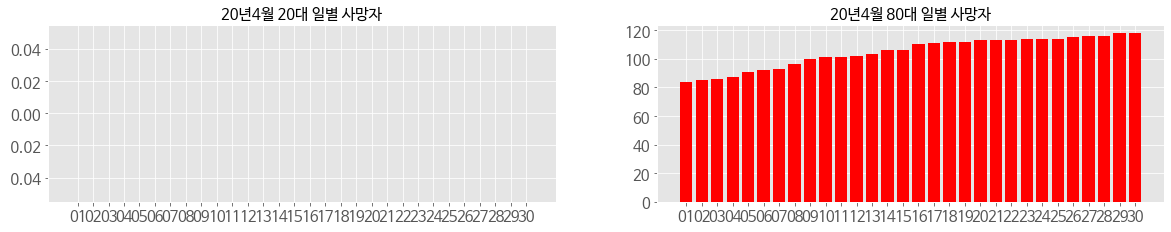

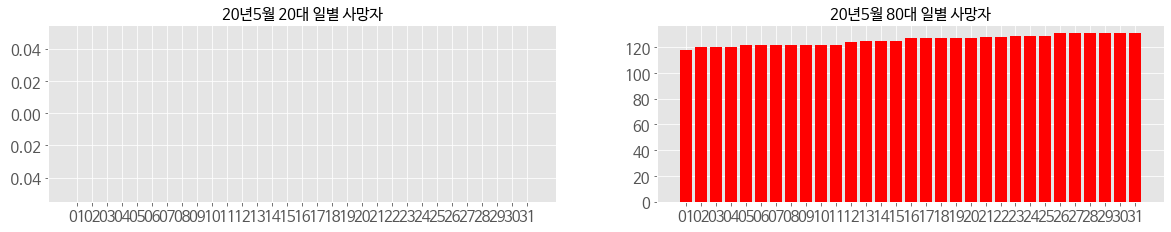

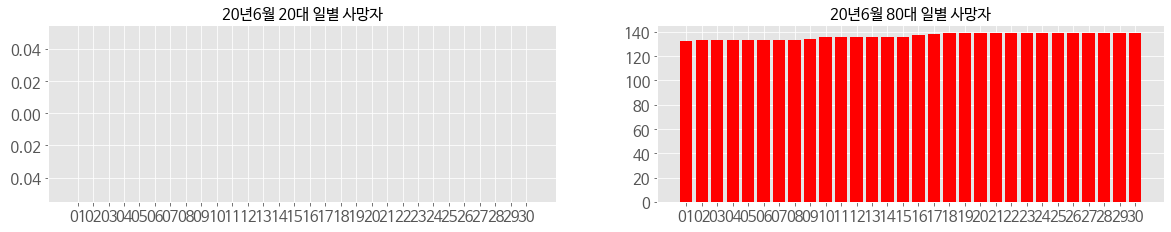

In [18]:
# 20대 80대 사망자 
for i in range(1,5):
    plt.figure(figsize= (20,15))
    plt.style.use('ggplot')      # 격자 무늬 스타일 지정

    # 20대 사망자 시각화
    plt.subplot(4,2,2*i-1)
    title='20년'+str(i+2)+"월 20대 일별 사망자"
    plt.title(title,fontsize=15)
    plt.xticks( fontsize=15)
    plt.yticks( fontsize=15)
    for j in range(len(month_date_date[i-1])):
        plt.bar(month_date_date[i-1][j],month_date_deceased[i-1][j],color='b')

    # 80대 사망자 시각화
    plt.subplot(4,2,i*2)
    title='20년'+str(i+2)+"월 80대 일별 사망자"
    plt.title(title,fontsize=15)
    plt.xticks( fontsize=15)
    plt.yticks( fontsize=15)
    for j in range(len(month_date_date[i-1])):
        plt.bar(month_date_date[i-1][j],month_date_deceased80[i-1][j],color='r')
    
plt.show()

#2. 20대 & 80대 확진자와 사망자 월별 시각화

### 2-1 데이터 전처리 

In [19]:
#전체 20대 확진자 
df2['age'].str 
df2_20 = df2[df2['age'].str.contains('20s')]

In [20]:
# 전체 80대 
df2['age'].str 
df2_80 = df2[df2['age'].str.contains('80s')]

In [21]:
# each month 20대 총 확진자

each_confirmed_20s = []

data_20_3 = df2_20[df2_20['date'].str.contains('2020-03')]
data_20total_3=data_20_3.groupby("age").sum()
each_confirmed_20s.append(data_20total_3.loc['20s','confirmed'])

data_20_4 = df2_20[df2_20['date'].str.contains('2020-04')]
data_20total_4=data_20_4.groupby("age").sum()
each_confirmed_20s.append(data_20total_4.loc['20s','confirmed'])

data_20_5 = df2_20[df2_20['date'].str.contains('2020-05')]
data_20total_5=data_20_5.groupby("age").sum()
each_confirmed_20s.append(data_20total_5.loc['20s','confirmed'])

data_20_6 = df2_20[df2_20['date'].str.contains('2020-06')]
data_20total_6=data_20_6.groupby("age").sum()
each_confirmed_20s.append(data_20total_6.loc['20s','confirmed'])
#data_20total_3
#data_20total_4
#data_20total_5
#data_20total_6 # 3-6월 중 6월 20대 총 확진자

In [22]:
# each month 80대 총 확진

each_confirmed_80s = []

data_80_3 = df2_80[df2_80['date'].str.contains('2020-03')]
data_80total_3=data_80_3.groupby("age").sum()
each_confirmed_80s.append(data_80total_3.loc['80s','confirmed'])

data_80_4 = df2_80[df2_80['date'].str.contains('2020-04')]
data_80total_4=data_80_4.groupby("age").sum()
each_confirmed_80s.append(data_80total_4.loc['80s','confirmed'])

data_80_5 = df2_80[df2_80['date'].str.contains('2020-05')]
data_80total_5=data_80_5.groupby("age").sum()
each_confirmed_80s.append(data_80total_5.loc['80s','confirmed'])

data_80_6 = df2_80[df2_80['date'].str.contains('2020-06')]
data_80total_6=data_80_6.groupby("age").sum()
each_confirmed_80s.append(data_80total_6.loc['80s','confirmed'])
#data_20total_3
#data_20total_4
#data_20total_5
#data_20total_6 # 3-6월 중 6월 20대 총 확진자

In [23]:
# each month 20대 사망자

each_deceased_20s = []

data_20_3 = df2_20[df2_20['date'].str.contains('2020-03')]
data_20total_3=data_20_3.groupby("age").sum()
each_deceased_20s.append(data_20total_3.loc['20s','deceased'])

data_20_4 = df2_20[df2_20['date'].str.contains('2020-04')]
data_20total_4=data_20_4.groupby("age").sum()
each_deceased_20s.append(data_20total_4.loc['20s','deceased'])

data_20_5 = df2_20[df2_20['date'].str.contains('2020-05')]
data_20total_5=data_20_5.groupby("age").sum()
each_deceased_20s.append(data_20total_5.loc['20s','deceased'])

data_20_6 = df2_20[df2_20['date'].str.contains('2020-06')]
data_20total_6=data_20_6.groupby("age").sum()
each_deceased_20s.append(data_20total_6.loc['20s','deceased'])
#data_20total_3
#data_20total_4
#data_20total_5
#data_20total_6 # 3-6월 중 6월 20대 총 확진자
each_deceased_20s

[0, 0, 0, 0]

In [24]:
#80대 사망자 
each_deceased_80s = []

data_80_3 = df2_80[df2_80['date'].str.contains('2020-03')]
data_80total_3=data_80_3.groupby("age").sum()
each_deceased_80s.append(data_80total_3.loc['80s','deceased'])

data_80_4 = df2_80[df2_80['date'].str.contains('2020-04')]
data_80total_4=data_80_4.groupby("age").sum()
each_deceased_80s.append(data_80total_4.loc['80s','deceased'])

data_80_5 = df2_80[df2_80['date'].str.contains('2020-05')]
data_80total_5=data_80_5.groupby("age").sum()
each_deceased_80s.append(data_80total_5.loc['80s','deceased'])

data_80_6 = df2_80[df2_80['date'].str.contains('2020-06')]
data_80total_6=data_80_6.groupby("age").sum()
each_deceased_80s.append(data_80total_6.loc['80s','deceased'])
#data_20total_3
#data_20total_4
#data_20total_5
#data_20total_6 # 3-6월 중 6월 20대 총 확진자
each_deceased_80s

[1004, 3142, 3895, 4095]

### 2-2. 20대 80대 월별 확진자 사망자 그래프 시각화

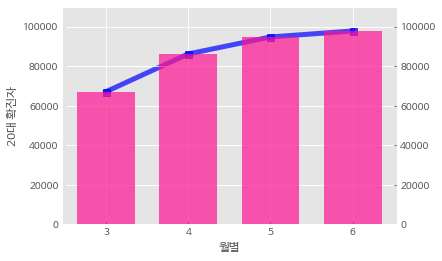

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

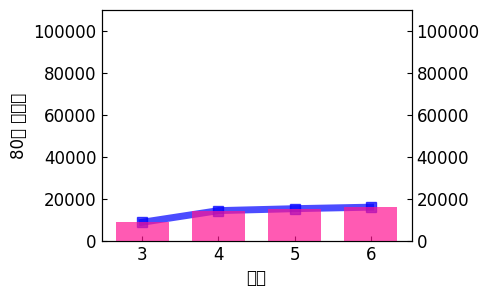

In [25]:
# 20대 확진자 월별 그래프
mon= ["3","4","5","6"]

x = mon
y1 = each_confirmed_20s
y2 = each_confirmed_20s


fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='b', markersize=7, linewidth=5, alpha=0.7)
ax1.set_ylim(0, 110000)
ax1.set_xlabel('월별')
ax1.set_ylabel('20대 확진자')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 110000)
#ax2.set_ylabel("20s 확진자")
ax2.tick_params(axis='y', direction='in')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

#80대 확진자 월별 그래프
x = mon
y1 = each_confirmed_80s
y2 = each_confirmed_80s

fig, ax1 = plt.subplots()
ax1.plot(x, y1, '-s', color='b', markersize=7, linewidth=5, alpha=0.7)
ax1.set_ylim(0, 110000)
ax1.set_xlabel('월별')
ax1.set_ylabel('80대 확진자')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 110000)
#ax2.set_ylabel("20s 확진자")
ax2.tick_params(axis='y', direction='in')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_

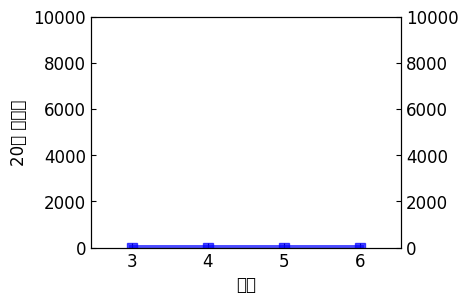

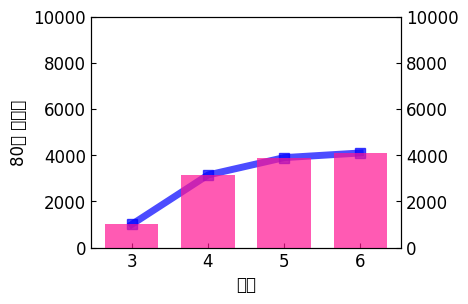

In [26]:
# 20대 사망자 
x = mon
y1 = each_deceased_20s
y2 = each_deceased_20s

fig, ax1 = plt.subplots()
ax1.plot(x, y1, '-s', color='b', markersize=7, linewidth=5, alpha=0.7)
ax1.set_ylim(0, 10000)
ax1.set_xlabel('월별')
ax1.set_ylabel('20대 사망자')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 10000)
#ax2.set_ylabel("20s confrimed")
ax2.tick_params(axis='y', direction='in')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

#80대 사망자 
x = mon
y1 = each_deceased_80s
y2 = each_deceased_80s


fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='b', markersize=7, linewidth=5, alpha=0.7)
ax1.set_ylim(0, 10000)
ax1.set_xlabel('월별')
ax1.set_ylabel('80대 사망자')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 10000)
#ax2.set_ylabel("20s confrimed")
ax2.tick_params(axis='y', direction='in')


plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

plt.show()

# 3. 월별 세대별 확진자와 사망자를  파악하기

### 3-1. 월별 데이터 전처리 

In [ ]:
#data['date'].str
df_age_03 = df[df['date'].str.contains('2020-03')]
df_age_04 = df[df['date'].str.contains('2020-04')]
df_age_05 = df[df['date'].str.contains('2020-05')]
df_age_06 = df[df['date'].str.contains('2020-06')]



#### 3-1-1. age(나이) 기준으로 그룹화

In [ ]:
df_age_03 =df_age_03.groupby("age").sum()
df_age_04 =df_age_04.groupby("age").sum()
df_age_05 =df_age_05.groupby("age").sum()
df_age_06 =df_age_06.groupby("age").sum()

#### 3-1-2. x축 표현하기 위한 age리스트 생성

In [ ]:
age=[]
for i in df_age_03.index:age.append(i)
print(len(age),"개\n",age)

9 개
 ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']


#### 3-1-3 전체 기간동안 총 세대별 확진자 리스트 

In [ ]:
month_age_confirmed=[]

tmp =[]

for num in df_age_03["confirmed"]:
    tmp.append(num)
month_age_confirmed.append(tmp) #month_age_confirmed리스트에 3월 리스트 넣는다.
tmp=[] #tmp초기화
    
for num in df_age_04["confirmed"]:
    tmp.append(num)
month_age_confirmed.append(tmp) #month_age_confirmed리스트에 4월 리스트 넣는다.
tmp=[] #tmp초기화

for num in df_age_04["confirmed"]:
    tmp.append(num)
month_age_confirmed.append(tmp) #month_age_confirmed리스트에 5월 리스트 넣는다.
tmp=[] #tmp초기화    

for num in df_age_04["confirmed"]:
    tmp.append(num)
month_age_confirmed.append(tmp) #month_age_confirmed리스트에 6월 리스트 넣는다.
tmp=[] #tmp초기화



#### 3-1-4. 전체 기간동안 총 세대별 사망자 리스트 

In [ ]:
 month_age_deceased=[]

tmp03 =[]
for num in df_age_03["deceased"]:
    tmp03.append(num)
month_age_deceased.append(tmp03) #month_age_confirmed리스트에 3월 리스트 넣는다.

tmp04=[] #tmp초기화
for num in df_age_04["deceased"]:
    tmp04.append(num)
month_age_deceased.append(tmp04) #month_age_confirmed리스트에 4월 리스트 넣는다.

tmp05=[] #tmp초기화
for num in df_age_05["deceased"]:
    tmp05.append(num)
month_age_deceased.append(tmp05) #month_age_confirmed리스트에 5월 리스트 넣는다.

tmp06=[] #tmp초기화    
for num in df_age_06["deceased"]:
    tmp06.append(num)
month_age_deceased.append(tmp06) #month_age_confirmed리스트에 6월 리스트 넣는다.

#del(tmp03)
#del(tmp04)
#del(tmp05)
#del(tmp06)

### 3-2. 전체 기간동안 총 세대별 확진자와 사망자 시각화

#### 3-2-1. 막대그래프


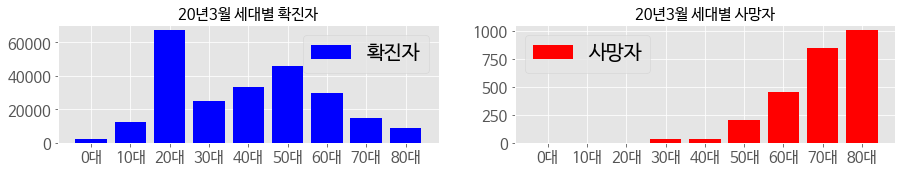

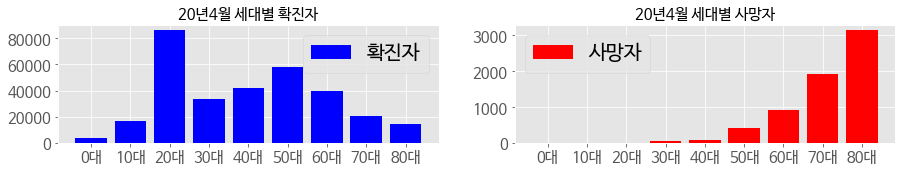

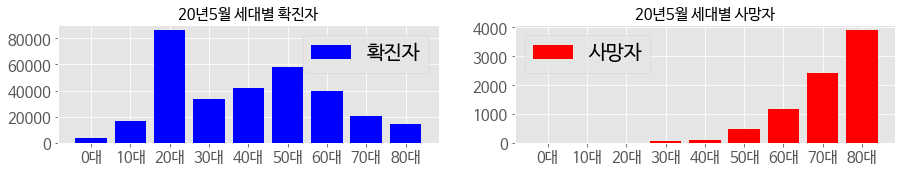

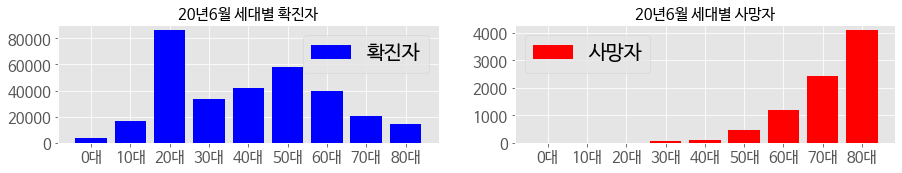

In [ ]:
import matplotlib.pyplot as plt

#color_list=['r','g','b','c','m','y','k'] # 칼라 리스트

#age의 10s, ~ 80s를 10대,~ 80대 로 변경하여 label리스트에 넣어줌
label = []
for strr in age:
    strr=strr.replace("s","대")
    label.append(strr)

for i in range(1,5):
    plt.figure(figsize= (15,10))
    plt.style.use('ggplot')      # 격자 무늬 스타일 지정

    # 확진자 시각화
    plt.subplot(4,2,2*i-1)
    title='20년'+str(i+2)+"월 세대별 확진자"
    plt.title(title,fontsize=15)
    plt.xticks( fontsize=15)
    plt.yticks( fontsize=15)
    plt.bar(label,month_age_confirmed[i-1],label="확진자",color='b')
    plt.rc('legend', fontsize=20) # 라벨 사이즈
    plt.legend()
    
    
    # 사망자 시각화
    plt.subplot(4,2,i*2)
    title='20년'+str(i+2)+"월 세대별 사망자"
    plt.title(title,fontsize=15)
    plt.xticks( fontsize=15)
    plt.yticks( fontsize=15)
    plt.bar(label,month_age_deceased[i-1],label="사망자",color='r')
    plt.rc('legend', fontsize=20) # 라벨 사이즈
    plt.legend()    
    
plt.show()



#### 3-2-2. 파이 그래프

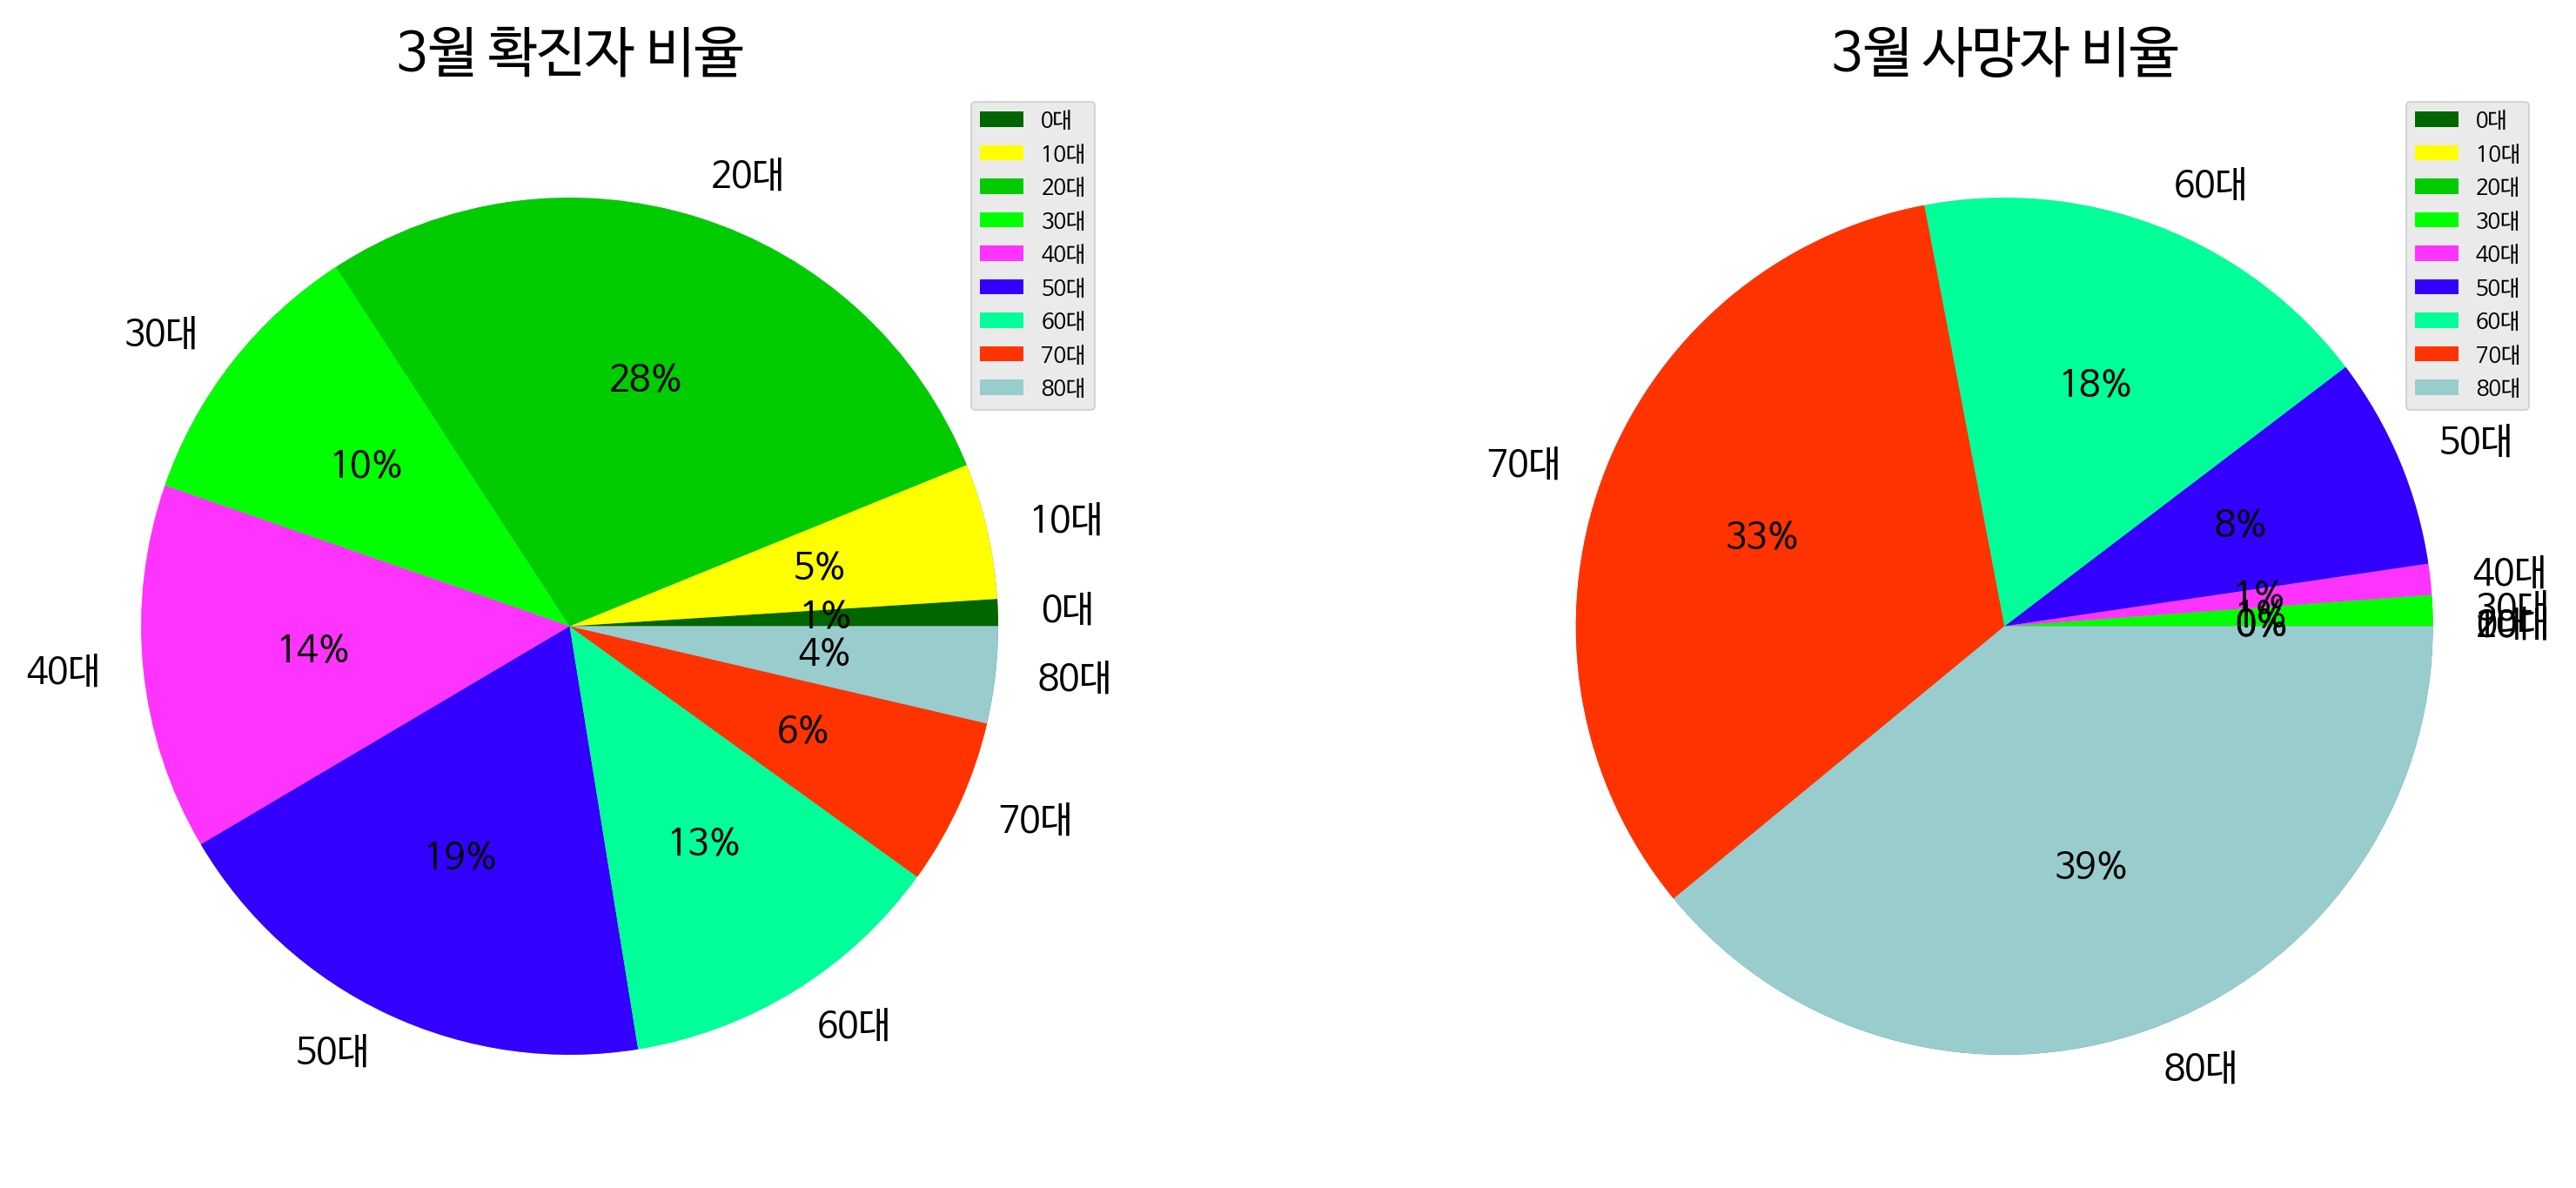

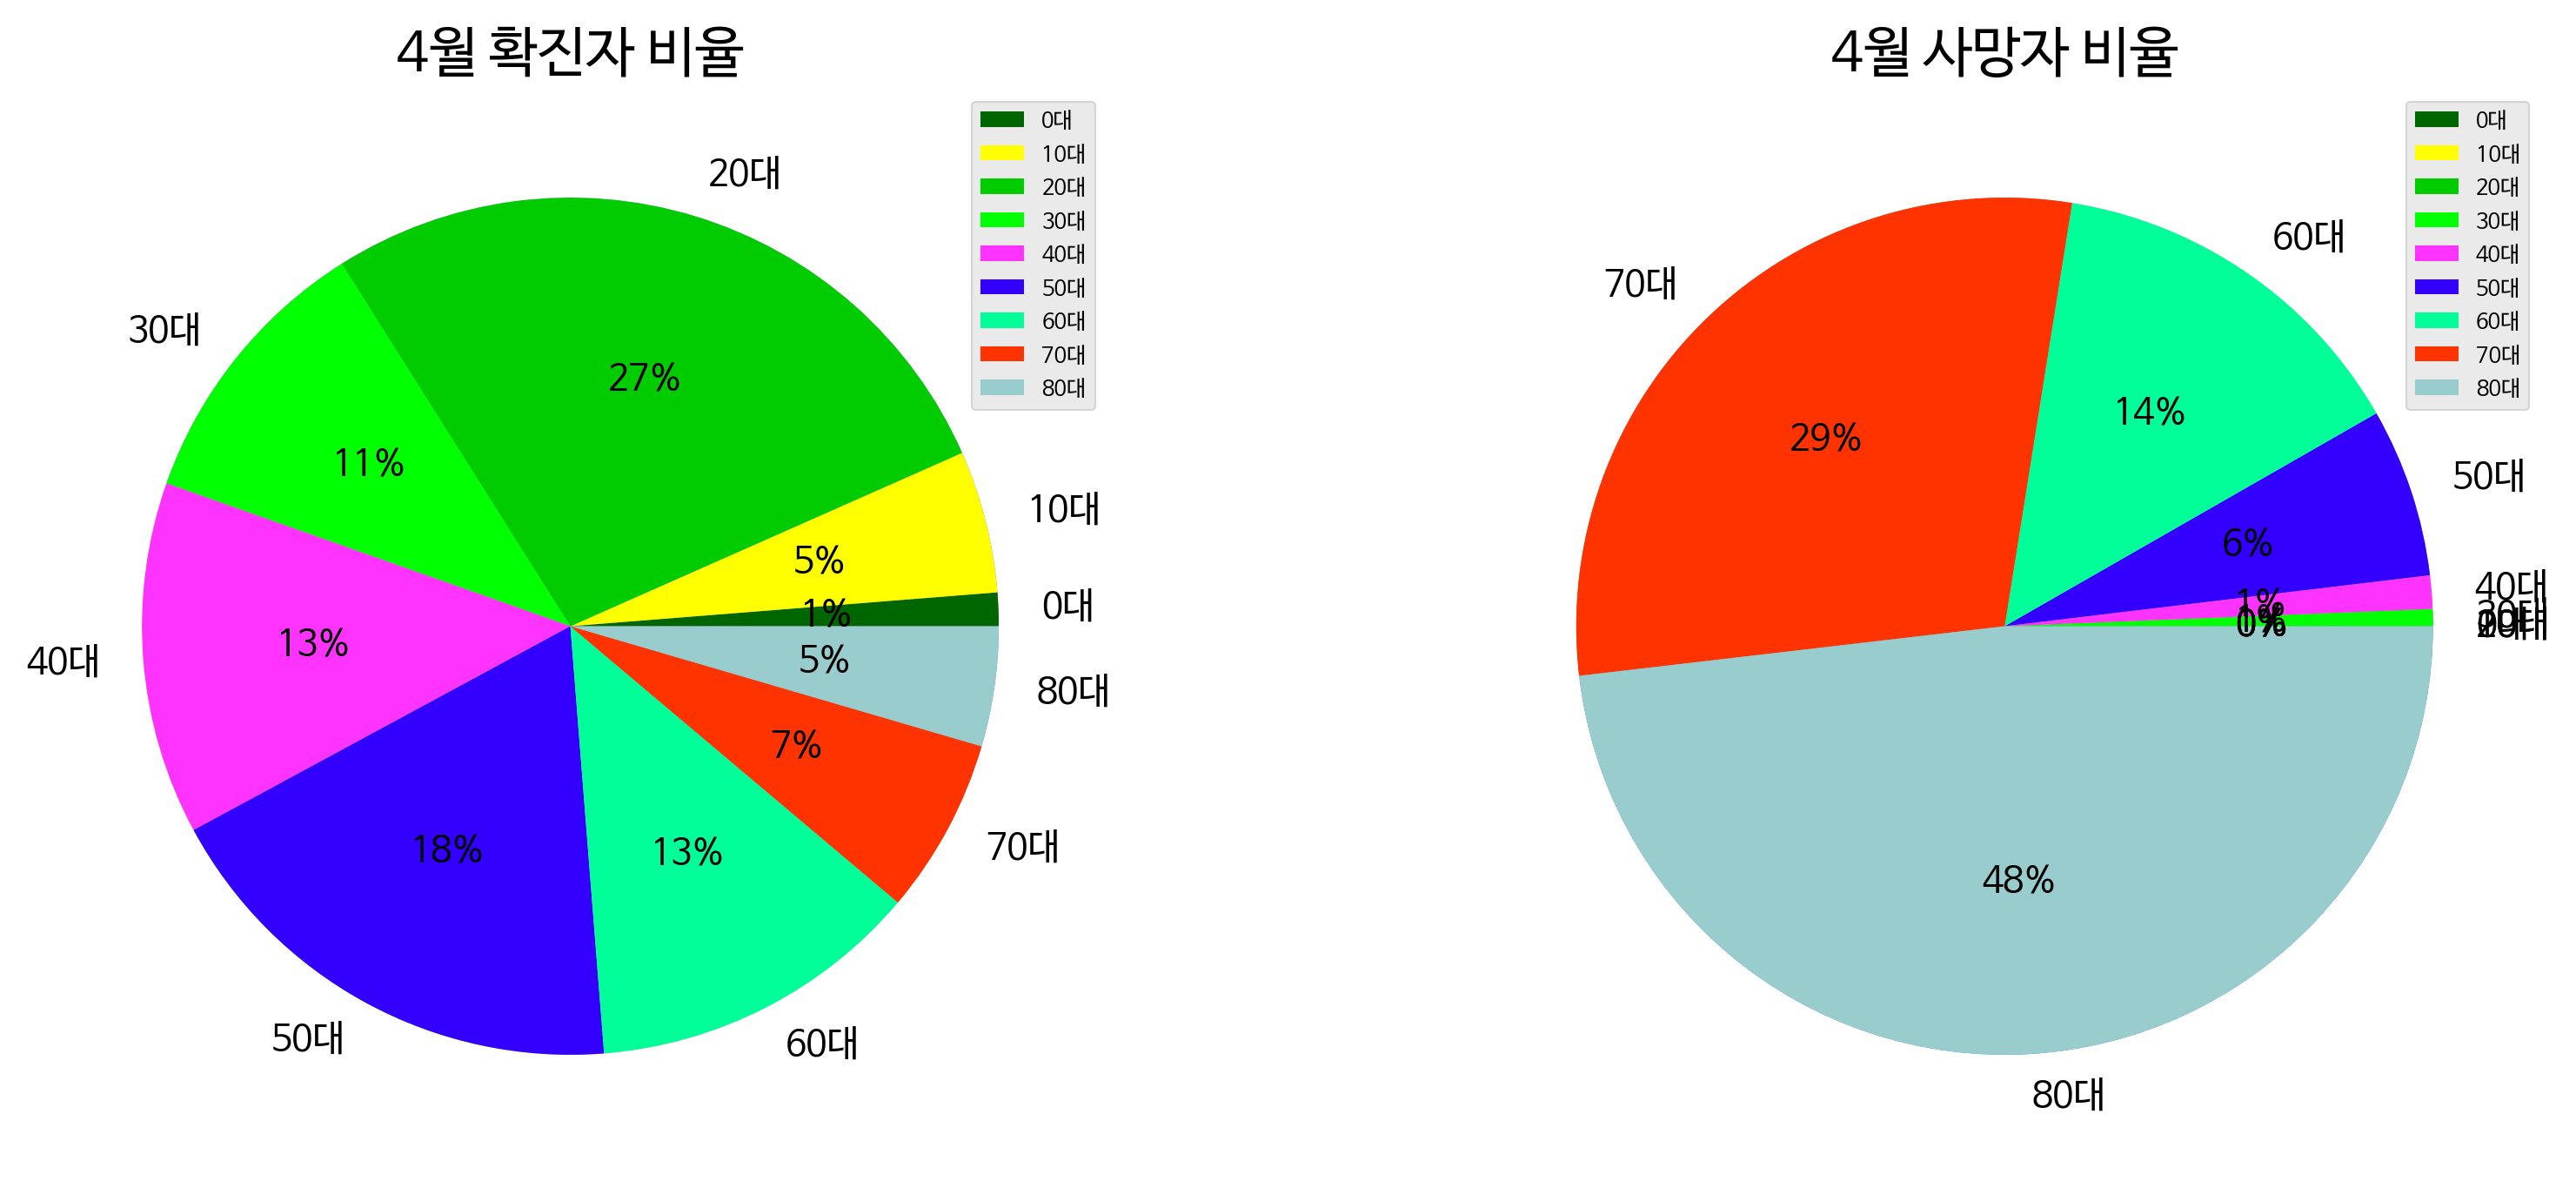

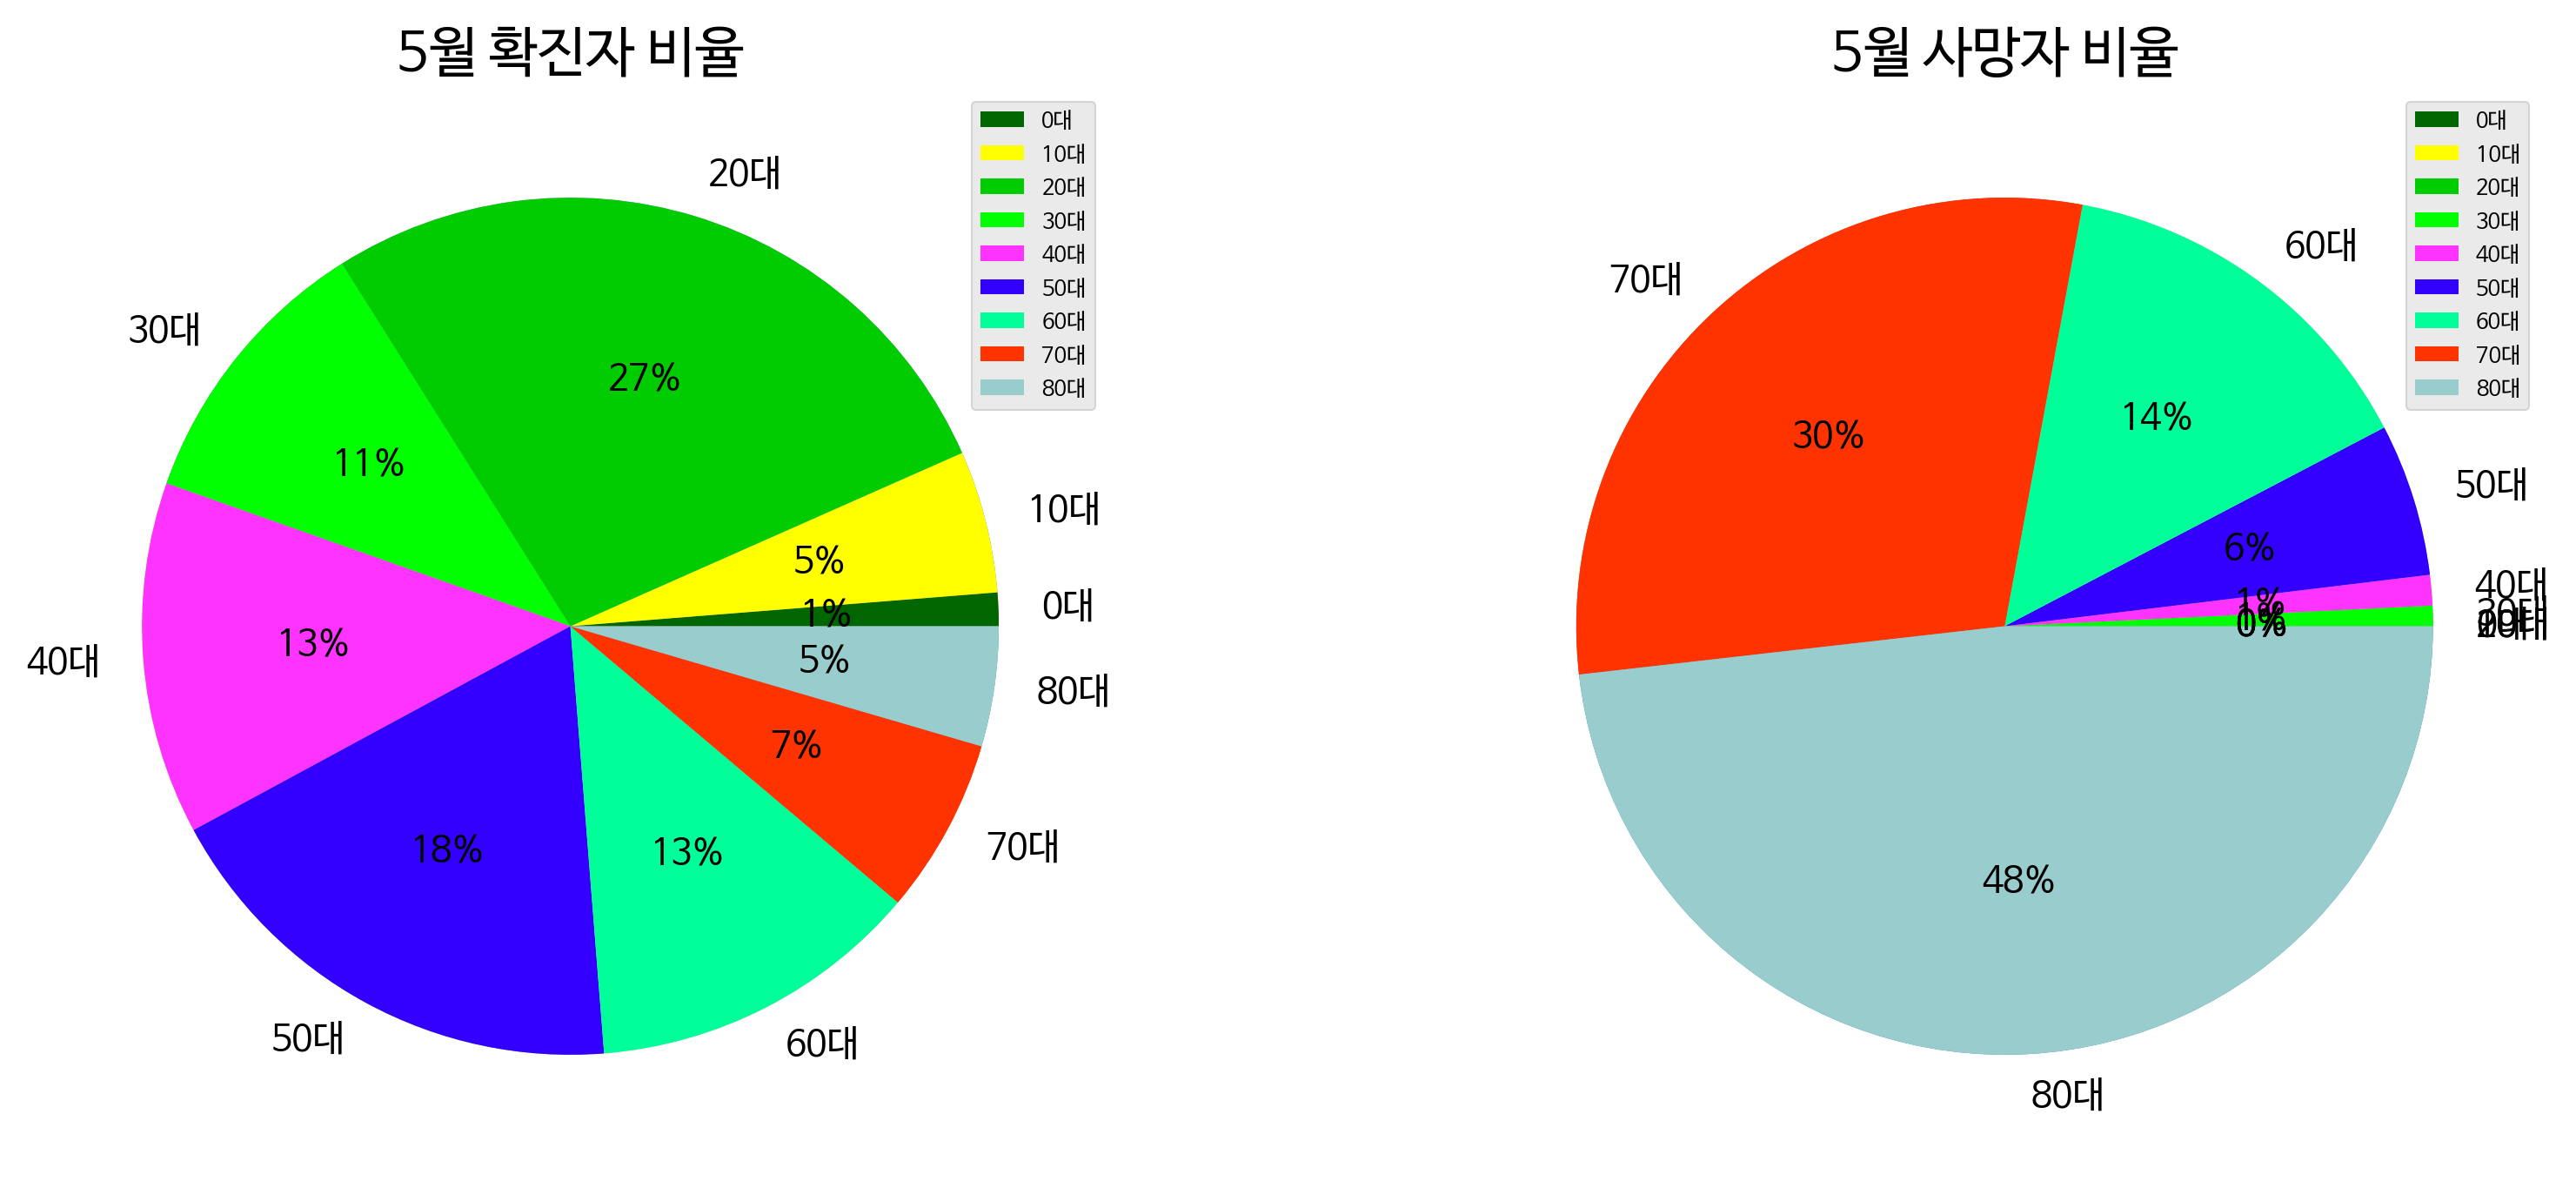

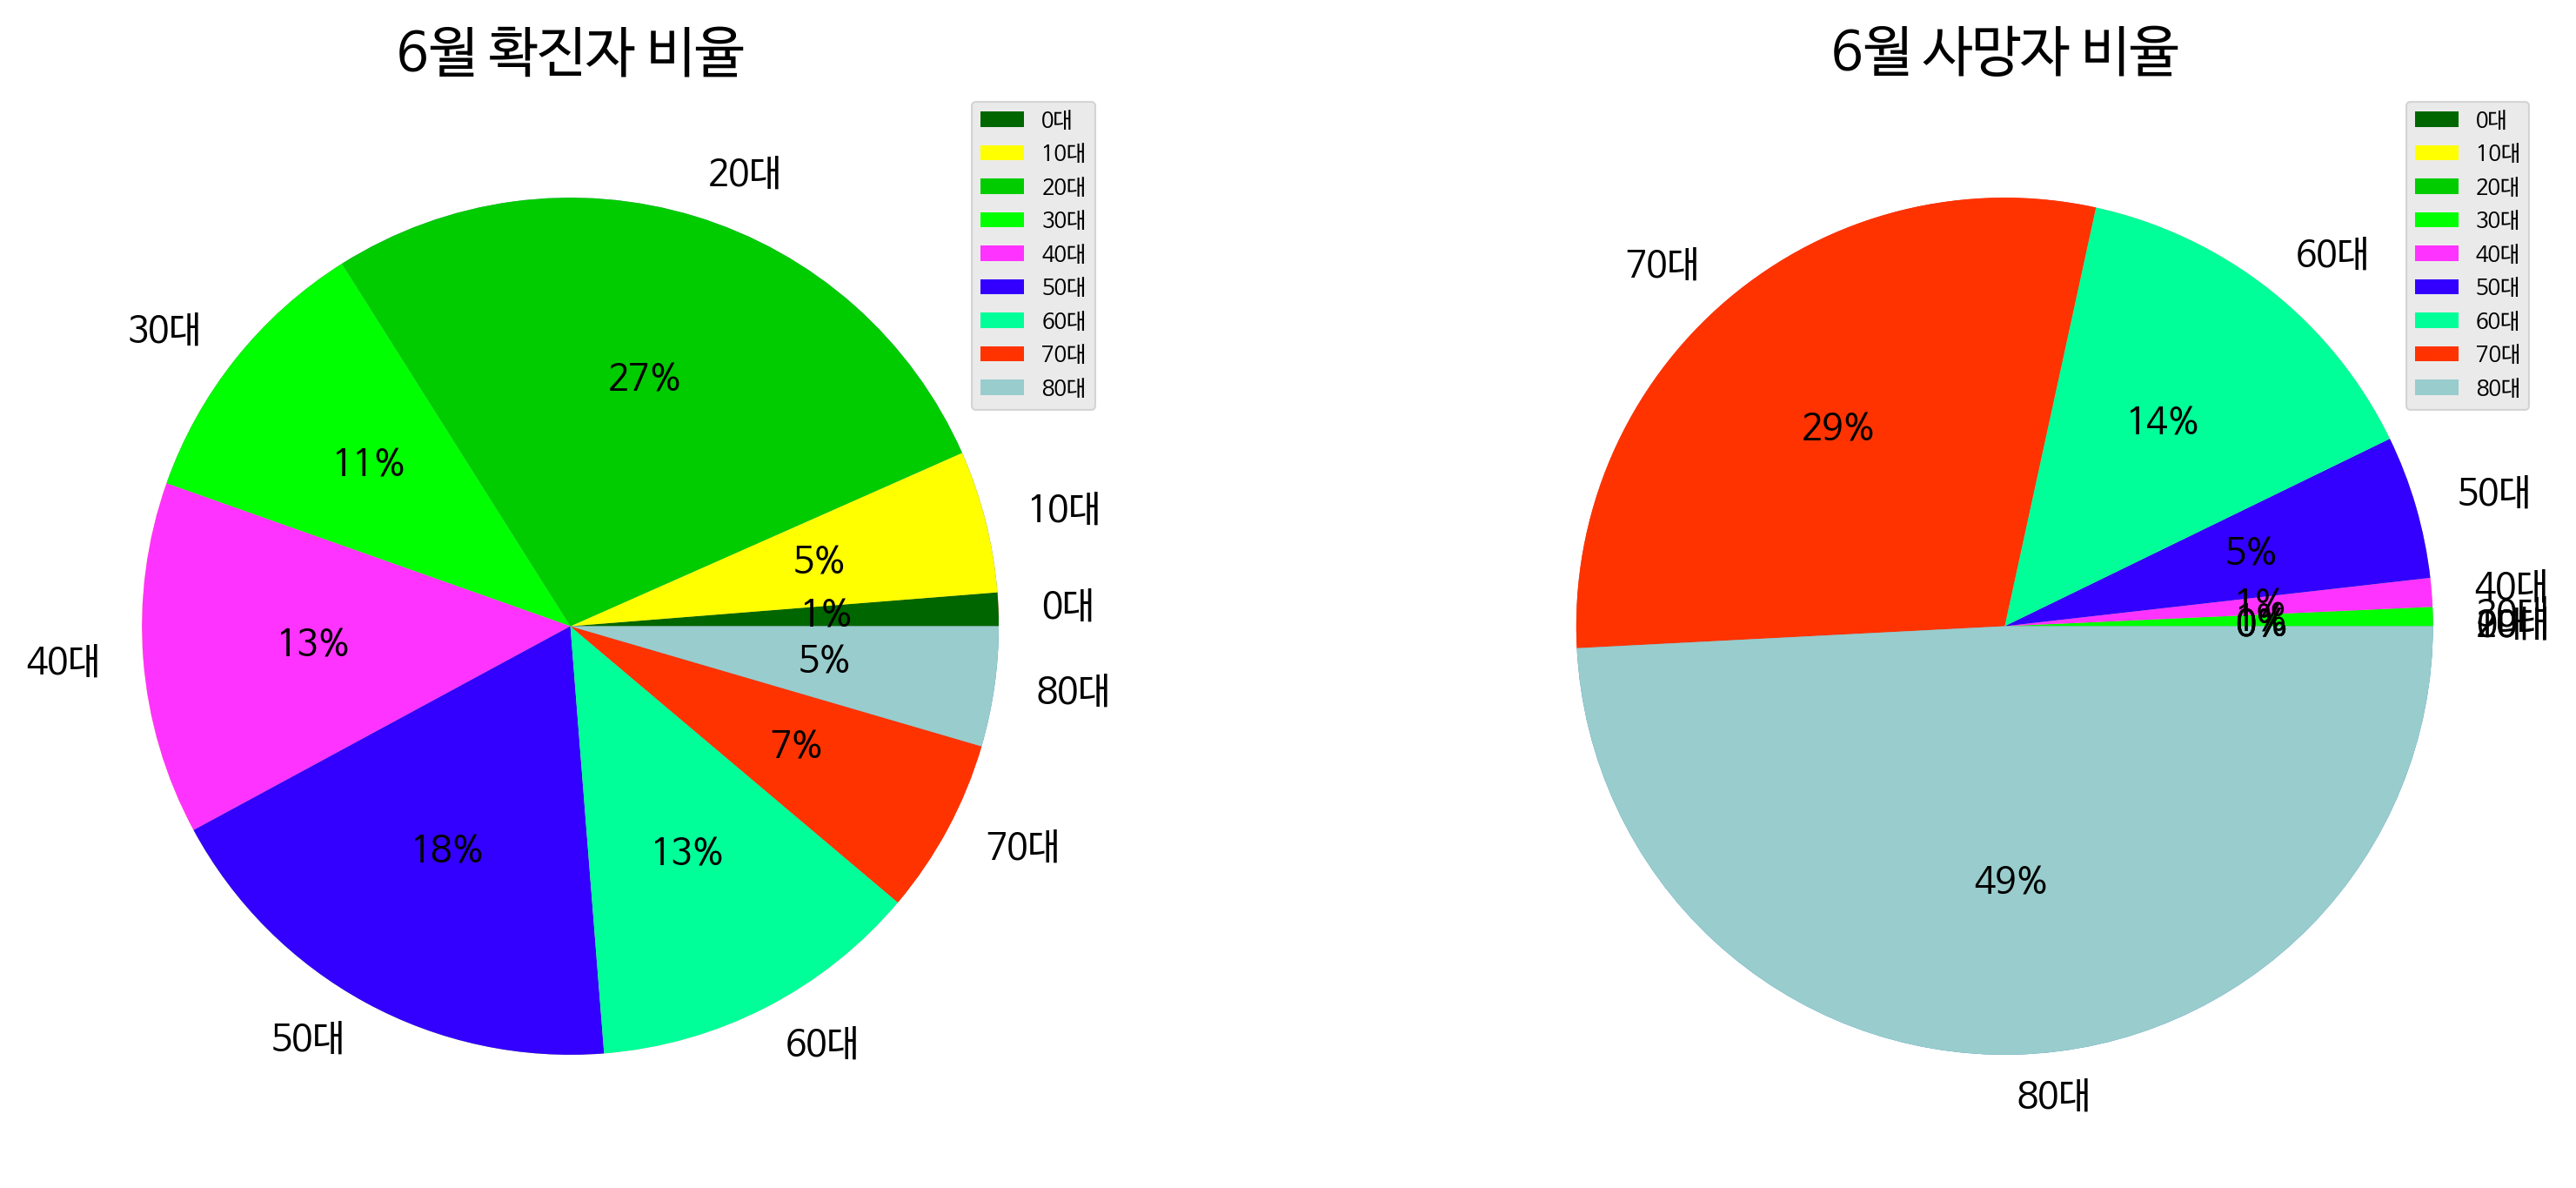

In [ ]:
import matplotlib.pyplot as plt

#color_list=['r','g','b','c','m','y','k','p','w'] # 칼라 리스트
color_list = ['#006600', '#FFFF00', '#00CC00', '#00FF00','#FF33FF','#3300FF','#00FF99','#FF3300','#99CCCC']

for i in range(1,5):
    plt.figure(figsize= (13,25),dpi = 300)
   
    # 확진자 시각화
    
    plt.subplot(4,2,2*i-1)
    title=str(i+2)+'월 확진자 비율'
    plt.title(title,fontsize=15)
    
    plt.pie(month_age_confirmed[i-1])
    plt.pie(month_age_confirmed[i-1], labels = label, autopct = '%1.f%%',colors=color_list )
    plt.rc('legend', fontsize=6) # 라벨 사이즈
    plt.legend()
    
    
    # 사망자 시각화
    plt.subplot(4,2,i*2)
    title=str(i+2)+'월 사망자 비율'
    plt.title(title,fontsize=15)
    plt.pie(month_age_deceased[i-1])
    plt.pie(month_age_deceased[i-1], labels = label, autopct = '%1.f%%',colors=color_list)
    plt.rc('legend', fontsize=6) # 라벨 사이즈
    plt.legend()    
    
plt.show()



# 4.전체 기간동안 세대별 확진자와 사망자 파악하기


### 4-1 age(나이) 기준으로 그룹화

In [ ]:
df_groupby_age=df.groupby("age").sum()
df_groupby_age

,time,confirmed,deceased
age,,,
0s,0,16107,0
10s,0,68752,0
20s,0,345827,0
30s,0,137539,194
40s,0,168250,295
50s,0,230030,1537
60s,0,158505,3743
70s,0,82107,7599
80s,0,54086,12136


#### 4-1-1 age 리스트 생성<br>     
age리스트에 유니크한 age 넣음<br>
-> 10s 20s, 30s,40s,50s,60s,70s,80s 원소를 갖는 리스트 생성

In [ ]:
age=[]
for i in df_groupby_age.index:age.append(i)
print(len(age),"개\n",age)

9 개
 ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']


#### 4-1-2 나이별 확진자 수 =total_age_confirmed

In [ ]:
total_age_confirmed =[]
for num in df_groupby_age["confirmed"]:
    total_age_confirmed.append(num)
print('나이대는 총',len(total_age_confirmed),"개\n0대~80대")

나이대는 총 9 개
0대~80대


#### 4-1-3 나이별 사망자 수 =total_age_deceased

In [ ]:
total_age_deceased =[]
for num in df_groupby_age["deceased"]:
    total_age_deceased.append(num)
len(total_age_deceased)
print(len(total_age_deceased),"개\n",total_age_deceased)

9 개
 [0, 0, 0, 194, 295, 1537, 3743, 7599, 12136]


### 4-2 막대 그래프

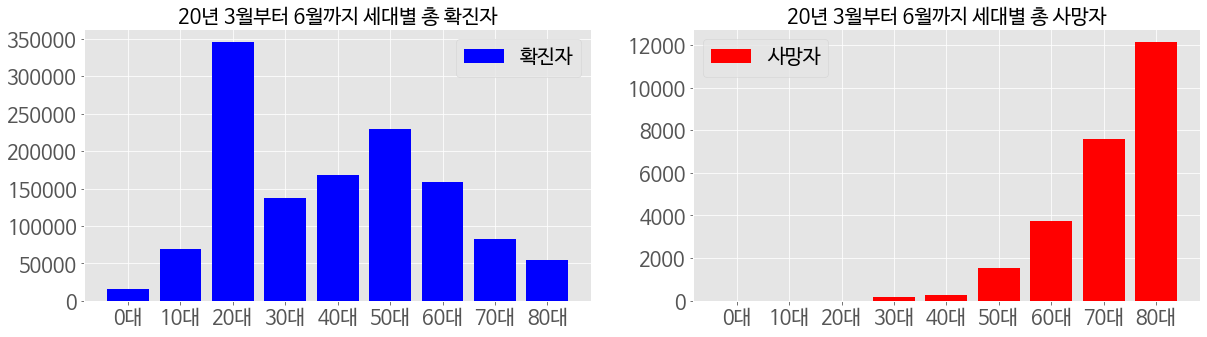

In [ ]:
# 막대 그래프
import matplotlib.pyplot as plt

#color_list=['r','g','b','c','m','y','k'] # 칼라 리스트

#age의 10s, ~ 80s를 10대,~ 80대 로 변경하여 label리스트에 넣어줌
label = []
for strr in age:
    strr=strr.replace("s","대")
    label.append(strr)


plt.figure(figsize= (20,5))


plt.style.use('ggplot')      # 격자 무늬 스타일 지정

# 확진자 시각화
plt.subplot(1,2,1)
plt.title("20년 3월부터 6월까지 세대별 총 확진자",fontsize=20)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.bar(label,total_age_confirmed,label="확진자",color='b')
plt.rc('legend', fontsize=20) # 라벨 사이즈
plt.legend()

# 사망자 시각화
plt.subplot(1,2,2)
plt.title("20년 3월부터 6월까지 세대별 총 사망자",fontsize=20)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.bar(label,total_age_deceased,label="사망자",color='r')
plt.rc('legend', fontsize=20) # 라벨 사이즈
plt.legend()    

plt.show()    

#### 4-2-1 파이 그래프

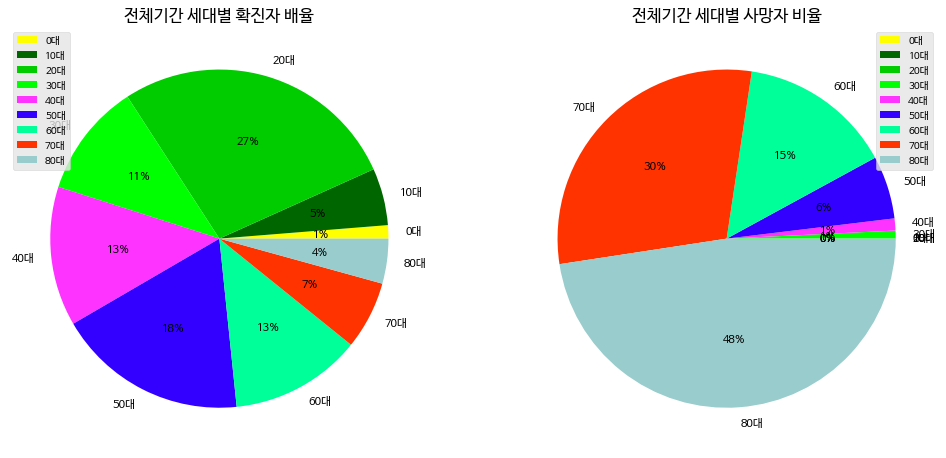

In [ ]:
# 파이 그래프
import matplotlib.pyplot as plt

#color_list=['r','g','b','c','m','y','k','p','w'] # 칼라 리스트
color_list = [ '#FFFF00','#006600', '#00CC00', '#00FF00','#FF33FF','#3300FF','#00FF99','#FF3300','#99CCCC']


plt.figure(figsize= (15,10),dpi = 80)
   
# 확진자 시각화
plt.subplot(1,2,1)
plt.title('전체기간 세대별 확진자 배율',fontsize=15)
plt.pie(total_age_confirmed, labels = label, autopct = '%1.f%%',colors=color_list )
plt.rc('legend', fontsize=9) # 라벨 사이즈
plt.legend()
    
    
# 사망자 시각화
plt.subplot(1,2,2)
plt.title('전체기간 세대별 사망자 비율',fontsize=15)
plt.pie(total_age_deceased, labels = label, autopct = '%1.f%%',colors=color_list)
plt.rc('legend', fontsize=9) # 라벨 사이즈
plt.legend()    
    
plt.show()



#5. 전체 기간 치사율을 계산 (numpy를 활용)

### 5-1. 전체 기간 치사율 전처리

In [ ]:
import numpy as np

## numpy를 사용하면 그 안에 있는 원소를 1:1대응으로 모두 연산해준다.
month_age_lethality= (np.array(month_age_deceased)/np.array(month_age_confirmed)) 
total_age_lethality= np.array(total_age_deceased)/np.array(total_age_confirmed)


month_age_lethality = np.round(month_age_lethality,3)*100
total_age_lethality = np.round(total_age_lethality,3)*100

In [ ]:
#전체기간 치사율
total_age_lethality

array([ 0. ,  0. ,  0. ,  0.1,  0.2,  0.7,  2.4,  9.3, 22.4])

In [ ]:
#3월 치사율리스트
month_age_lethality[0]

array([ 0. ,  0. ,  0. ,  0.1,  0.1,  0.5,  1.5,  5.6, 11.5])

In [ ]:
#4월 시차율 리스트
month_age_lethality[1]
#5월 시차율 리스트
#month_age_lethality[2]
#6월 시차율 리스트
#month_age_lethality[3]

array([ 0. ,  0. ,  0. ,  0.1,  0.2,  0.7,  2.3,  9.2, 22. ])

### 5-2. 치사율 그래프

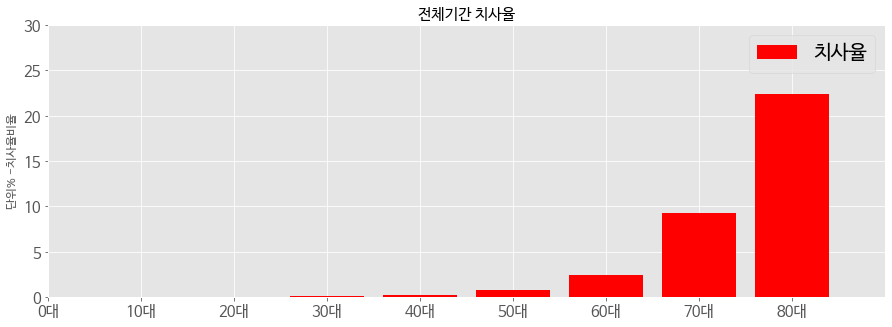

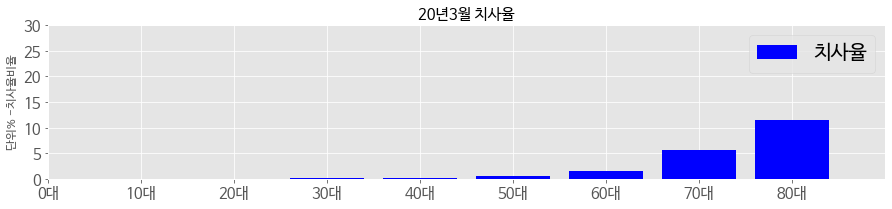

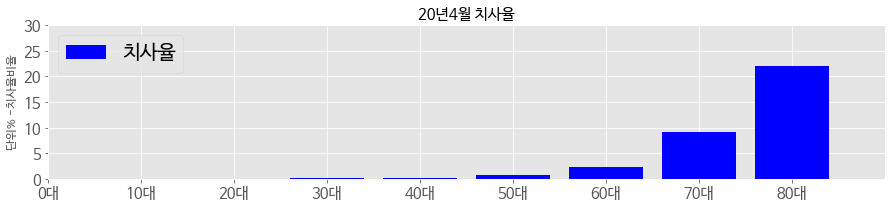

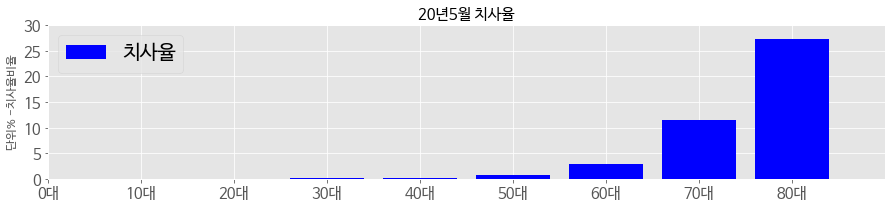

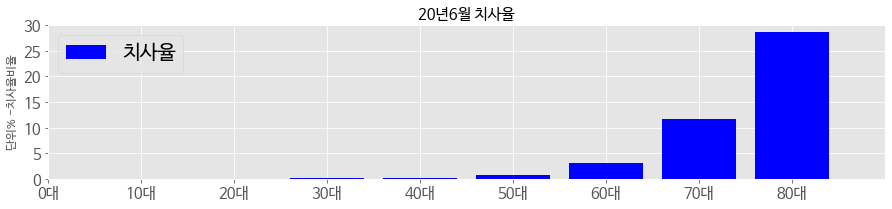

In [ ]:
import matplotlib.pyplot as plt

#color_list=['r','g','b','c','m','y','k'] # 칼라 리스트

#age 10s, ~ 80s를 10대,~ 80대 로 변경해준다.
label = []
for strr in age:
    strr=strr.replace("s","대")
    label.append(strr)

#전체 치사율
plt.figure(figsize= (15,5))
plt.style.use('ggplot')      # 격자 무늬 스타일 지정
plt.title('전체기간 치사율',fontsize=15)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.axis([0, 9,0, 30])
plt.ylabel('단위% -치사율비율')
plt.bar(label,total_age_lethality,label="치사율",color='r')
plt.rc('legend', fontsize=20) # 라벨 사이즈
plt.legend()
plt.show()

    
    
#월별 치사율
for i in range(1,5):
    plt.figure(figsize= (15,13)) # 그래프 크기 조절
    
    plt.subplot(4,1,i)           # 그래프 개수 지정 
    plt.style.use('ggplot')      # 격자 무늬 스타일 지정

    # 치사율 시각화
    title='20년'+str(i+2)+"월 치사율"
    plt.title(title,fontsize=15)  # 타이블 이름 지정
    plt.xticks( fontsize=15)      # x축 폰트사이트 조절
    plt.yticks( fontsize=15)      # y출 폰트사이즈 조절
    plt.axis([0, 9,0, 30])        # 0,9는 x축 표현개수 범위 , 0,30은 y축 표현값범위 
    plt.ylabel('단위% -치사율비율')  # y축 라벨 지정 
    plt.bar(label,month_age_lethality[i-1],label="치사율",color='b')
    plt.rc('legend', fontsize=20) # 라벨 사이즈
    plt.legend()                  # 라벨 표시하기 위한 것
    plt.show()
    

    


# 비고
코렙 한글 설정코드

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 